In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [2]:
dataset = pd.read_csv('C:\\Users\\Admin\\Desktop\\DS.csv', header=None)
#pd.to_numeric(dataset)


In [3]:
print(dataset.describe())

               0            1            2            3           4    \
count  2772.000000  2771.000000  2354.000000  2355.000000    4.000000   
mean     71.246032     0.411043    80.137213   168.489172  104.250000   
std     105.584008     0.492112    21.777735    16.291218   55.841293   
min   -4149.000000     0.000000    35.000000    50.000000   57.000000   
25%      65.000000     0.000000    70.000000   165.000000   76.500000   
50%      70.000000     0.000000    78.000000   170.000000   87.500000   
75%      76.000000     1.000000    87.000000   177.000000  115.250000   
max    1965.000000     1.000000   657.000000   198.000000  185.000000   

               5            6            7            8            9    \
count  2772.000000  2772.000000  2407.000000  2772.000000  2772.000000   
mean     -0.833333    -0.964646    55.614458    -0.681818    -0.945166   
std       0.552871     0.263595     8.350545     0.731654     0.326649   
min      -1.000000    -1.000000    10.000000  

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Columns: 434 entries, 0 to 433
dtypes: float64(377), int64(56), object(1)
memory usage: 9.2+ MB


In [5]:
dataset.dtypes

0        int64
1      float64
2      float64
3      float64
4      float64
5        int64
6        int64
7      float64
8        int64
9        int64
10       int64
11       int64
12       int64
13       int64
14       int64
15       int64
16       int64
17       int64
18       int64
19       int64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
        ...   
404    float64
405    float64
406    float64
407    float64
408    float64
409    float64
410    float64
411    float64
412    float64
413    float64
414    float64
415    float64
416    float64
417    float64
418    float64
419    float64
420    float64
421    float64
422    float64
423    float64
424    float64
425    float64
426    float64
427    float64
428    float64
429    float64
430    float64
431    float64
432    float64
433    float64
Length: 434, dtype: object

In [6]:
# print the first 20 rows of data
print(dataset.head(20))

    0    1      2      3    4    5    6     7    8    9   ...   424  425  426  \
0    79  1.0   73.0  164.0  NaN   -1   -1   NaN   -1   -1 ...  -1.0 -1.0 -1.0   
1    76  0.0   74.0  172.0  NaN    1   -1   NaN    1   -1 ...  -1.0 -1.0 -1.0   
2    72  1.0    NaN    NaN  NaN    1    1  45.0    1   -1 ...  -1.0 -1.0 -1.0   
3    63  1.0   75.0  168.0  NaN   -1   -1  60.0   -1   -1 ...  -1.0 -1.0 -1.0   
4    80  0.0   85.0  187.0  NaN   -1   -1  60.0   -1   -1 ...  -1.0 -1.0 -1.0   
5    71  0.0   78.0  165.0  NaN   -1   -1  40.0   -1   -1 ...  -1.0 -1.0 -1.0   
6    82  0.0   94.0  175.0  NaN   -1   -1   NaN   -1   -1 ...  -1.0 -1.0 -1.0   
7    65  1.0   87.0  165.0  NaN   -1   -1  60.0   -1   -1 ...  -1.0 -1.0 -1.0   
8    81  0.0   79.0  167.0  NaN   -1   -1  60.0    1   -1 ...  -1.0 -1.0 -1.0   
9    72  0.0   78.0  173.0  NaN   -1   -1  60.0   -1   -1 ...  -1.0 -1.0 -1.0   
10   74  1.0   70.0  165.0  NaN   -1   -1  60.0    1   -1 ...  -1.0 -1.0 -1.0   
11   57  0.0   90.0  175.0  

In [7]:
Data_no_missing=dataset.dropna(axis='columns', how='any')

In [8]:
Data_no_missing.shape

(2772, 56)

In [10]:
Data_no_missing

,0,5,6,8,9,10,11,12,13,14,...,63,64,65,66,68,69,70,71,72,73
0,79,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,-1
1,76,1,-1,1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2,72,1,1,1,-1,1,1,1,1,1,...,-1,-1,-1,-1,1,-1,-1,-1,1,-1
3,63,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,80,-1,-1,-1,-1,1,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,1,-1,-1,-1
5,71,-1,-1,-1,-1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
6,82,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,1,-1,1,-1,-1,-1,-1
7,65,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
8,81,-1,-1,1,-1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,-1
9,72,-1,-1,-1,-1,1,1,1,-1,-1,...,-1,-1,-1,-1,1,1,-1,-1,-1,-1


In [11]:
Data_no_missing.to_csv('Data_no_missing_G.csv')

In [12]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\gender.csv', header=None)


In [13]:
df

,0
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [14]:
df.isnull().sum()

0    0
dtype: int64

In [15]:
print(df[0].unique())


[1 0]


In [16]:
print(df.groupby(0).size())


0
0    1633
1    1139
dtype: int64


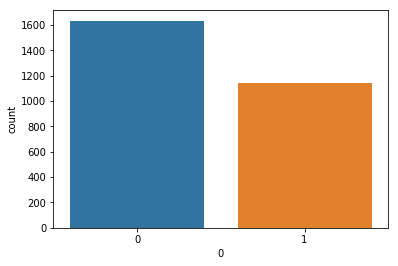

In [17]:
sns.countplot(df[0],label="Count")
plt.show()

In [18]:
DNM = pd.read_csv('C:\\Users\\Admin\\Desktop\\Data_no_missing_G.csv', header=None)


In [19]:
DNM.shape

(2772, 56)

In [20]:
# clasiffication 
#sellect f and data 
y = df[0]
X=DNM[:]

In [21]:
#Create Training and Test Sets and Apply Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
len(X_train)

2079

In [31]:
len(X_test)

693

In [32]:
len(y_test)

693

In [33]:
len(y_train)

2079

In [22]:
#Build Models
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.62


In [23]:
#Decision Tree
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.54


In [24]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.57


In [25]:
#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.64
Accuracy of LDA classifier on test set: 0.61


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [26]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.60
Accuracy of GNB classifier on test set: 0.57


In [27]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.59
Accuracy of SVM classifier on test set: 0.59


In [28]:
#The KNN algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[271 138]
 [158 126]]
             precision    recall  f1-score   support

          0       0.63      0.66      0.65       409
          1       0.48      0.44      0.46       284

avg / total       0.57      0.57      0.57       693



In [29]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\DS.csv', header=None)
data = data.apply(lambda x: x.sort_values().values)
print (data)

       0    1     2     3      4    5    6     7    8    9   ...   424  425  \
0    -4149  0.0  35.0  50.0   57.0   -1   -1  10.0   -1   -1 ...  -1.0 -1.0   
1     -932  0.0  35.0  54.0   83.0   -1   -1  10.0   -1   -1 ...  -1.0 -1.0   
2     -928  0.0  40.0  56.0   92.0   -1   -1  10.0   -1   -1 ...  -1.0 -1.0   
3       30  0.0  40.0  60.0  185.0   -1   -1  15.0   -1   -1 ...  -1.0 -1.0   
4       30  0.0  40.0  60.0    NaN   -1   -1  15.0   -1   -1 ...  -1.0 -1.0   
5       35  0.0  40.0  62.0    NaN   -1   -1  15.0   -1   -1 ...  -1.0 -1.0   
6       36  0.0  40.0  62.0    NaN   -1   -1  15.0   -1   -1 ...  -1.0 -1.0   
7       38  0.0  45.0  63.0    NaN   -1   -1  20.0   -1   -1 ...  -1.0 -1.0   
8       39  0.0  45.0  64.0    NaN   -1   -1  20.0   -1   -1 ...  -1.0 -1.0   
9       41  0.0  45.0  65.0    NaN   -1   -1  20.0   -1   -1 ...  -1.0 -1.0   
10      41  0.0  46.0  65.0    NaN   -1   -1  20.0   -1   -1 ...  -1.0 -1.0   
11      42  0.0  47.0  65.0    NaN   -1   -1  20.0  